In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
##(training sample,r,g,b)

(50000, 32, 32, 3)

In [31]:


y_train.shape


(50000, 1)

In [33]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [35]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [37]:
y_test = y_test.reshape(-1,)

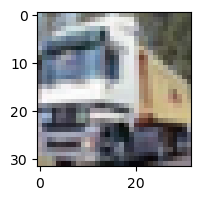

In [19]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [25]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

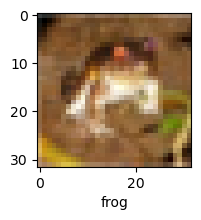

In [39]:
plot_sample(X_train, y_train, 0)

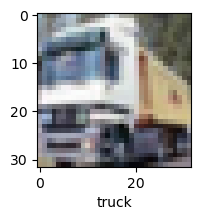

In [41]:

plot_sample(X_train, y_train, 1)

In [43]:
### Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [45]:
### Build simple Artifical Neuaral Netwrok

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\dell\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - accuracy: 0.3058 - loss: 1.9252
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4169 - loss: 1.6509
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4512 - loss: 1.5564
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4752 - loss: 1.4909
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4923 - loss: 1.4345


In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.43      0.50      1000
           1       0.33      0.87      0.48      1000
           2       0.41      0.28      0.33      1000
           3       0.40      0.23      0.29      1000
           4       0.49      0.37      0.42      1000
           5       0.46      0.30      0.36      1000
           6       0.45      0.66      0.53      1000
           7       0.64      0.47      0.54      1000
           8       0.57      0.58      0.58      1000
           9       0.50      0.40      0.45      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



In [49]:
### Now Let's try with CNN i.e Convolutional Neural Network to TRain our images

In [51]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\dell\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.3756 - loss: 1.6974
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5877 - loss: 1.1716
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6467 - loss: 1.0135
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6798 - loss: 0.9265
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7101 - loss: 0.8384


In [57]:
### ANN = 48% , CNN = 71%

In [59]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6940 - loss: 0.8911


[0.9013662934303284, 0.6877999901771545]

In [61]:

y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[2.5690068e-03, 4.1607927e-04, 8.8240337e-03, 7.2475374e-01,
        6.9117248e-03, 1.9236317e-01, 2.4018422e-02, 2.8474429e-03,
        3.6722880e-02, 5.7337136e-04],
       [8.8445835e-02, 1.3939211e-01, 3.1311309e-04, 7.5401304e-06,
        3.6394013e-06, 3.3275182e-07, 5.7951200e-07, 2.1239952e-05,
        7.5728953e-01, 1.4526070e-02],
       [7.9534657e-02, 3.3643878e-01, 7.5848615e-03, 1.2680950e-02,
        1.9330258e-03, 1.4305484e-03, 7.8778481e-04, 1.9832645e-03,
        5.0900555e-01, 4.8620570e-02],
       [7.9668796e-01, 3.1968325e-02, 2.8277149e-02, 1.4602310e-03,
        3.3187447e-03, 4.8946913e-05, 5.7194004e-04, 7.4804120e-04,
        1.3635997e-01, 5.5876828e-04],
       [3.6494209e-06, 1.6906671e-04, 2.7112944e-02, 3.5227112e-02,
        8.7119639e-02, 3.5495944e-03, 8.4673798e-01, 3.8112150e-05,
        3.0915176e-05, 1.0937509e-05]], dtype=float32)

In [63]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [65]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

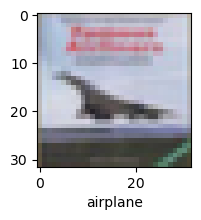

In [67]:
plot_sample(X_test, y_test,3)

In [69]:

classes[y_classes[3]]

'airplane'

In [71]:
classes[y_classes[3]]

'airplane'